<a href="https://colab.research.google.com/github/Kanki-Studio/Player-Market-Value-Prediction/blob/main/Market_value.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Final.xlsx to Final.xlsx


In [ ]:
data = pd.read_excel('Final.xlsx')

In [ ]:
data.head()

,Unnamed: 0.1,Unnamed: 0,Player,Market value,Nation,Pos,Club_x,Leauge,Age,MP,...,Int,Clr,Passes Completed,Passes Attempted,Cmp%,Touches,Succ_y,Att,Succ%,#Pl
0,0,0,Kylian Mbappé,€180.00m,FRA,FW,Paris S-G,Ligue1,20.0,49.0,...,7.0,3.0,1152.0,1494.0,77.11,2120.0,132.0,247.0,53.44,152.0
1,1,1,Raheem Sterling,€128.00m,ENG,FW,Manchester City,Premier Leauge,24.0,60.0,...,27.0,13.0,1963.0,2414.0,81.32,3209.0,139.0,258.0,53.88,151.0
2,2,2,Neymar,€128.00m,BRA,"MF,FW",Paris S-G,Ligue1,27.0,32.0,...,10.0,2.0,1588.0,2016.0,78.77,2696.0,164.0,292.0,56.16,184.0
3,3,3,Sadio Mané,€120.00m,SEN,FW,Liverpool,Premier Leauge,27.0,64.0,...,28.0,11.0,1728.0,2214.0,78.05,3050.0,128.0,212.0,60.38,142.0
4,4,4,Mohamed Salah,€120.00m,EGY,FW,Liverpool,Premier Leauge,27.0,65.0,...,12.0,5.0,1516.0,2029.0,74.72,2893.0,137.0,229.0,59.83,148.0


In [ ]:
data.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Player', 'Market value', 'Nation', 'Pos',
       'Club_x', 'Leauge', 'Age', 'MP', 'Starts', 'Min', 'Gls', 'Ast', 'PK_x',
       'PKatt_x', 'CrdY', 'CrdR', 'Gls90', 'Ast90', 'G+A', 'Gls+Ast', 'PK',
       'PKatt', 'Sh', 'SoT', 'FK', 'SoT%', 'Sh/90', 'SoT/90', 'G/Sh', 'G/SoT',
       'Tackle', 'TackleW', 'TakleD', 'Tkl%', 'Press', 'Succ_x', '%', 'Blocks',
       'ShotB', 'PassB', 'Int', 'Clr', 'Passes Completed', 'Passes Attempted',
       'Cmp%', 'Touches', 'Succ_y', 'Att', 'Succ%', '#Pl'],
      dtype='object')

In [ ]:
data.isnull().sum()

Unnamed: 0.1          0
Unnamed: 0            0
Player                0
Market value          0
Nation              147
Pos                 147
Club_x              147
Leauge              147
Age                 154
MP                  161
Starts              161
Min                 161
Gls                 161
Ast                 161
PK_x                161
PKatt_x             161
CrdY                161
CrdR                161
Gls90               161
Ast90               161
G+A                 161
Gls+Ast             161
PK                  154
PKatt               154
Sh                  161
SoT                 161
FK                  154
SoT%                161
Sh/90               161
SoT/90              161
G/Sh                161
G/SoT               161
Tackle              161
TackleW             161
TakleD              160
Tkl%                154
Press               161
Succ_x              161
%                   161
Blocks              161
ShotB               161
PassB           

In [ ]:
data.shape

(517, 52)

In [ ]:
data['Pos'].unique()

array(['FW', 'MF,FW', 'MF', 'DF', nan, 'MF,DF', 'WB', 'DF,MF'],
      dtype=object)

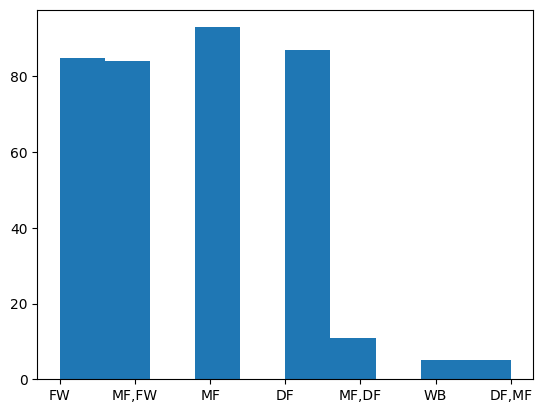

In [ ]:
plt.hist(data['Pos'].dropna())
plt.show();

In [ ]:
data['Market value'].head(10)

0    €180.00m
1    €128.00m
2    €128.00m
3    €120.00m
4    €120.00m
5    €120.00m
6    €120.00m
7    €117.00m
8    €112.00m
9     €99.00m
Name: Market value, dtype: object

In [ ]:
data['Market value'] = data['Market value'].str.replace('€','').str.replace('m','')

In [ ]:
data['Market value'].head()

0    180.00
1    128.00
2    128.00
3    120.00
4    120.00
Name: Market value, dtype: object

In [ ]:
data['Market value'] = data['Market value'].astype(float).astype(int)

In [ ]:
data['Market value'].head()

0    180
1    128
2    128
3    120
4    120
Name: Market value, dtype: int64

In [ ]:
data['Market value'] = data['Market value']*1000000

In [ ]:
data['Market value'].head()

0    180000000
1    128000000
2    128000000
3    120000000
4    120000000
Name: Market value, dtype: int64

In [ ]:
data.head()

,Unnamed: 0.1,Unnamed: 0,Player,Market value,Nation,Pos,Club_x,Leauge,Age,MP,...,Int,Clr,Passes Completed,Passes Attempted,Cmp%,Touches,Succ_y,Att,Succ%,#Pl
0,0,0,Kylian Mbappé,180000000,FRA,FW,Paris S-G,Ligue1,20.0,49.0,...,7.0,3.0,1152.0,1494.0,77.11,2120.0,132.0,247.0,53.44,152.0
1,1,1,Raheem Sterling,128000000,ENG,FW,Manchester City,Premier Leauge,24.0,60.0,...,27.0,13.0,1963.0,2414.0,81.32,3209.0,139.0,258.0,53.88,151.0
2,2,2,Neymar,128000000,BRA,"MF,FW",Paris S-G,Ligue1,27.0,32.0,...,10.0,2.0,1588.0,2016.0,78.77,2696.0,164.0,292.0,56.16,184.0
3,3,3,Sadio Mané,120000000,SEN,FW,Liverpool,Premier Leauge,27.0,64.0,...,28.0,11.0,1728.0,2214.0,78.05,3050.0,128.0,212.0,60.38,142.0
4,4,4,Mohamed Salah,120000000,EGY,FW,Liverpool,Premier Leauge,27.0,65.0,...,12.0,5.0,1516.0,2029.0,74.72,2893.0,137.0,229.0,59.83,148.0


In [ ]:
data = data.drop(columns=['Unnamed: 0.1','Unnamed: 0'])

In [ ]:
data.head()

,Player,Market value,Nation,Pos,Club_x,Leauge,Age,MP,Starts,Min,...,Int,Clr,Passes Completed,Passes Attempted,Cmp%,Touches,Succ_y,Att,Succ%,#Pl
0,Kylian Mbappé,180000000,FRA,FW,Paris S-G,Ligue1,20.0,49.0,41.0,3856.0,...,7.0,3.0,1152.0,1494.0,77.11,2120.0,132.0,247.0,53.44,152.0
1,Raheem Sterling,128000000,ENG,FW,Manchester City,Premier Leauge,24.0,60.0,56.0,4968.0,...,27.0,13.0,1963.0,2414.0,81.32,3209.0,139.0,258.0,53.88,151.0
2,Neymar,128000000,BRA,"MF,FW",Paris S-G,Ligue1,27.0,32.0,31.0,2757.0,...,10.0,2.0,1588.0,2016.0,78.77,2696.0,164.0,292.0,56.16,184.0
3,Sadio Mané,120000000,SEN,FW,Liverpool,Premier Leauge,27.0,64.0,61.0,5327.0,...,28.0,11.0,1728.0,2214.0,78.05,3050.0,128.0,212.0,60.38,142.0
4,Mohamed Salah,120000000,EGY,FW,Liverpool,Premier Leauge,27.0,65.0,64.0,5579.0,...,12.0,5.0,1516.0,2029.0,74.72,2893.0,137.0,229.0,59.83,148.0


In [ ]:
data.columns

Index(['Player', 'Market value', 'Nation', 'Pos', 'Club_x', 'Leauge', 'Age',
       'MP', 'Starts', 'Min', 'Gls', 'Ast', 'PK_x', 'PKatt_x', 'CrdY', 'CrdR',
       'Gls90', 'Ast90', 'G+A', 'Gls+Ast', 'PK', 'PKatt', 'Sh', 'SoT', 'FK',
       'SoT%', 'Sh/90', 'SoT/90', 'G/Sh', 'G/SoT', 'Tackle', 'TackleW',
       'TakleD', 'Tkl%', 'Press', 'Succ_x', '%', 'Blocks', 'ShotB', 'PassB',
       'Int', 'Clr', 'Passes Completed', 'Passes Attempted', 'Cmp%', 'Touches',
       'Succ_y', 'Att', 'Succ%', '#Pl'],
      dtype='object')

In [ ]:
data[['Gls90','Ast90','Gls','Ast','G+A','Gls+Ast']].head()

,Gls90,Ast90,Gls,Ast,G+A,Gls+Ast
0,1.19,0.28,51.0,12.0,1.47,63.0
1,0.53,0.18,29.0,10.0,0.71,39.0
2,0.91,0.42,28.0,13.0,1.33,41.0
3,0.63,0.14,37.0,8.0,0.77,45.0
4,0.63,0.24,39.0,15.0,0.87,54.0


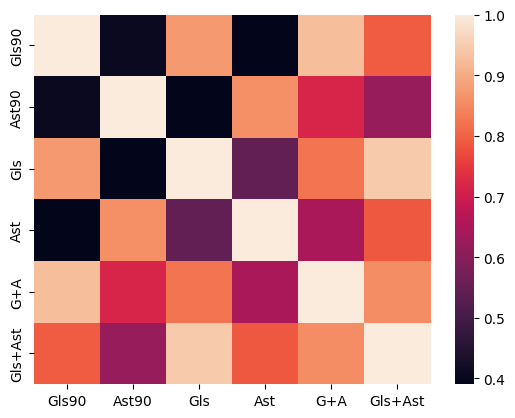

In [ ]:
sns.heatmap(data[['Gls90','Ast90','Gls','Ast','G+A','Gls+Ast']].corr());

In [ ]:
data[['Gls90','Ast90','Gls','Ast','G+A','Gls+Ast','Market value']].corr()

,Gls90,Ast90,Gls,Ast,G+A,Gls+Ast,Market value
Gls90,1.000000,0.407220,0.872060,0.390432,0.927600,0.792498,0.406188
Ast90,0.407220,1.000000,0.390982,0.859049,0.718936,0.619909,0.316074
Gls,0.872060,0.390982,1.000000,0.543475,0.823591,0.945810,0.486915
Ast,0.390432,0.859049,0.543475,1.000000,0.648507,0.786603,0.410979
G+A,0.927600,0.718936,0.823591,0.648507,1.000000,0.856678,0.438406
Gls+Ast,0.792498,0.619909,0.945810,0.786603,0.856678,1.000000,0.517144
Market value,0.406188,0.316074,0.486915,0.410979,0.438406,0.517144,1.000000


In [ ]:
data = data.drop(columns=['Gls90','Ast90','Gls','Ast','G+A'])

In [ ]:
data.head()

,Player,Market value,Nation,Pos,Club_x,Leauge,Age,MP,Starts,Min,...,Int,Clr,Passes Completed,Passes Attempted,Cmp%,Touches,Succ_y,Att,Succ%,#Pl
0,Kylian Mbappé,180000000,FRA,FW,Paris S-G,Ligue1,20.0,49.0,41.0,3856.0,...,7.0,3.0,1152.0,1494.0,77.11,2120.0,132.0,247.0,53.44,152.0
1,Raheem Sterling,128000000,ENG,FW,Manchester City,Premier Leauge,24.0,60.0,56.0,4968.0,...,27.0,13.0,1963.0,2414.0,81.32,3209.0,139.0,258.0,53.88,151.0
2,Neymar,128000000,BRA,"MF,FW",Paris S-G,Ligue1,27.0,32.0,31.0,2757.0,...,10.0,2.0,1588.0,2016.0,78.77,2696.0,164.0,292.0,56.16,184.0
3,Sadio Mané,120000000,SEN,FW,Liverpool,Premier Leauge,27.0,64.0,61.0,5327.0,...,28.0,11.0,1728.0,2214.0,78.05,3050.0,128.0,212.0,60.38,142.0
4,Mohamed Salah,120000000,EGY,FW,Liverpool,Premier Leauge,27.0,65.0,64.0,5579.0,...,12.0,5.0,1516.0,2029.0,74.72,2893.0,137.0,229.0,59.83,148.0


In [ ]:
data[['PK_x', 'PKatt_x','SoT%', 'Sh/90', 'SoT/90', 'G/Sh', 'G/SoT','Sh', 'SoT']].head()

,PK_x,PKatt_x,SoT%,Sh/90,SoT/90,G/Sh,G/SoT,Sh,SoT
0,1.0,2.0,54.55,4.88,2.66,0.24,0.45,209.0,114.0
1,0.0,1.0,40.52,2.77,1.12,0.19,0.47,153.0,62.0
2,9.0,10.0,45.22,3.75,1.70,0.24,0.54,115.0,52.0
3,0.0,0.0,48.00,2.53,1.22,0.25,0.51,150.0,72.0
4,6.0,6.0,42.92,3.87,1.66,0.16,0.38,240.0,103.0


In [ ]:
data[['PK_x', 'PKatt_x','SoT%', 'Sh/90', 'SoT/90', 'G/Sh', 'G/SoT','Sh', 'SoT','Market value']].corr()

,PK_x,PKatt_x,SoT%,Sh/90,SoT/90,G/Sh,G/SoT,Sh,SoT,Market value
PK_x,1.000000,0.984635,0.201608,0.465211,0.471565,0.317753,0.246282,0.634604,0.639738,0.283018
PKatt_x,0.984635,1.000000,0.209244,0.482945,0.487530,0.315642,0.238844,0.649397,0.652104,0.281183
SoT%,0.201608,0.209244,1.000000,0.358863,0.569242,0.620918,0.155320,0.269100,0.439063,0.230814
Sh/90,0.465211,0.482945,0.358863,1.000000,0.946614,0.250103,0.092332,0.800987,0.796940,0.301004
SoT/90,0.471565,0.487530,0.569242,0.946614,1.000000,0.377185,0.126871,0.759973,0.832658,0.356253
G/Sh,0.317753,0.315642,0.620918,0.250103,0.377185,1.000000,0.813739,0.240426,0.356267,0.273279
G/SoT,0.246282,0.238844,0.155320,0.092332,0.126871,0.813739,1.000000,0.116876,0.150843,0.158506
Sh,0.634604,0.649397,0.269100,0.800987,0.759973,0.240426,0.116876,1.000000,0.962139,0.415557
SoT,0.639738,0.652104,0.439063,0.796940,0.832658,0.356267,0.150843,0.962139,1.000000,0.466712
Market value,0.283018,0.281183,0.230814,0.301004,0.356253,0.273279,0.158506,0.415557,0.466712,1.000000


In [ ]:
data = data.drop(columns = ['PK_x', 'PKatt_x','SoT%', 'Sh/90', 'SoT/90', 'G/Sh', 'G/SoT'])

In [ ]:
data.head()

,Player,Market value,Nation,Pos,Club_x,Leauge,Age,MP,Starts,Min,...,Int,Clr,Passes Completed,Passes Attempted,Cmp%,Touches,Succ_y,Att,Succ%,#Pl
0,Kylian Mbappé,180000000,FRA,FW,Paris S-G,Ligue1,20.0,49.0,41.0,3856.0,...,7.0,3.0,1152.0,1494.0,77.11,2120.0,132.0,247.0,53.44,152.0
1,Raheem Sterling,128000000,ENG,FW,Manchester City,Premier Leauge,24.0,60.0,56.0,4968.0,...,27.0,13.0,1963.0,2414.0,81.32,3209.0,139.0,258.0,53.88,151.0
2,Neymar,128000000,BRA,"MF,FW",Paris S-G,Ligue1,27.0,32.0,31.0,2757.0,...,10.0,2.0,1588.0,2016.0,78.77,2696.0,164.0,292.0,56.16,184.0
3,Sadio Mané,120000000,SEN,FW,Liverpool,Premier Leauge,27.0,64.0,61.0,5327.0,...,28.0,11.0,1728.0,2214.0,78.05,3050.0,128.0,212.0,60.38,142.0
4,Mohamed Salah,120000000,EGY,FW,Liverpool,Premier Leauge,27.0,65.0,64.0,5579.0,...,12.0,5.0,1516.0,2029.0,74.72,2893.0,137.0,229.0,59.83,148.0


In [ ]:
data[['Passes Completed',	'Passes Attempted','Touches','Succ_y',	'Att',	'Succ%','Market value']].corr()

,Passes Completed,Passes Attempted,Touches,Succ_y,Att,Succ%,Market value
Passes Completed,1.000000,0.991153,0.969399,0.012823,-0.034816,0.345205,0.210034
Passes Attempted,0.991153,1.000000,0.989371,0.070462,0.027327,0.298556,0.229343
Touches,0.969399,0.989371,1.000000,0.161908,0.125184,0.255972,0.258041
Succ_y,0.012823,0.070462,0.161908,1.000000,0.986443,-0.162556,0.358337
Att,-0.034816,0.027327,0.125184,0.986443,1.000000,-0.279278,0.380677
Succ%,0.345205,0.298556,0.255972,-0.162556,-0.279278,1.000000,-0.121350
Market value,0.210034,0.229343,0.258041,0.358337,0.380677,-0.121350,1.000000


In [ ]:
data = data.drop(columns=['Passes Completed',	'Passes Attempted','Touches','Succ_y',	'Att',	'Succ%'])

In [ ]:
data.head()

,Player,Market value,Nation,Pos,Club_x,Leauge,Age,MP,Starts,Min,...,Press,Succ_x,%,Blocks,ShotB,PassB,Int,Clr,Cmp%,#Pl
0,Kylian Mbappé,180000000,FRA,FW,Paris S-G,Ligue1,20.0,49.0,41.0,3856.0,...,418.0,98.0,23.44,14.0,6.0,8.0,7.0,3.0,77.11,152.0
1,Raheem Sterling,128000000,ENG,FW,Manchester City,Premier Leauge,24.0,60.0,56.0,4968.0,...,849.0,249.0,29.33,58.0,4.0,54.0,27.0,13.0,81.32,151.0
2,Neymar,128000000,BRA,"MF,FW",Paris S-G,Ligue1,27.0,32.0,31.0,2757.0,...,381.0,103.0,27.03,24.0,0.0,24.0,10.0,2.0,78.77,184.0
3,Sadio Mané,120000000,SEN,FW,Liverpool,Premier Leauge,27.0,64.0,61.0,5327.0,...,1151.0,342.0,29.71,64.0,8.0,56.0,28.0,11.0,78.05,142.0
4,Mohamed Salah,120000000,EGY,FW,Liverpool,Premier Leauge,27.0,65.0,64.0,5579.0,...,1103.0,320.0,29.01,31.0,5.0,26.0,12.0,5.0,74.72,148.0


In [ ]:
data[['MP','Press','Succ_x','%','Blocks','ShotB','PassB','Int','Clr','Cmp%','Min','Starts']].head()

,MP,Press,Succ_x,%,Blocks,ShotB,PassB,Int,Clr,Cmp%,Min,Starts
0,49.0,418.0,98.0,23.44,14.0,6.0,8.0,7.0,3.0,77.11,3856.0,41.0
1,60.0,849.0,249.0,29.33,58.0,4.0,54.0,27.0,13.0,81.32,4968.0,56.0
2,32.0,381.0,103.0,27.03,24.0,0.0,24.0,10.0,2.0,78.77,2757.0,31.0
3,64.0,1151.0,342.0,29.71,64.0,8.0,56.0,28.0,11.0,78.05,5327.0,61.0
4,65.0,1103.0,320.0,29.01,31.0,5.0,26.0,12.0,5.0,74.72,5579.0,64.0


In [ ]:
data[['MP','Press','Succ_x','%','Blocks','ShotB','PassB','Int','Clr','Cmp%','Min','Starts','Market value']].corr()

,MP,Press,Succ_x,%,Blocks,ShotB,PassB,Int,Clr,Cmp%,Min,Starts,Market value
MP,1.000000,0.704730,0.714971,-0.013902,0.597959,0.276170,0.597789,0.428382,0.287219,-0.105015,0.929651,0.918433,0.225606
Press,0.704730,1.000000,0.960422,-0.250657,0.538857,-0.072717,0.691622,0.290130,-0.122593,-0.236699,0.664370,0.672191,0.125899
Succ_x,0.714971,0.960422,1.000000,-0.008754,0.630277,0.031696,0.753444,0.414756,0.001884,-0.116731,0.702693,0.707118,0.154285
%,-0.013902,-0.250657,-0.008754,1.000000,0.282130,0.459121,0.125693,0.430767,0.542311,0.460241,0.116701,0.106488,0.040810
Blocks,0.597959,0.538857,0.630277,0.282130,1.000000,0.614757,0.927008,0.806685,0.582305,0.174534,0.702760,0.695224,-0.005343
ShotB,0.276170,-0.072717,0.031696,0.459121,0.614757,1.000000,0.274084,0.609410,0.872403,0.339794,0.425384,0.410804,-0.084769
PassB,0.597789,0.691622,0.753444,0.125693,0.927008,0.274084,1.000000,0.693836,0.295187,0.051239,0.654622,0.652367,0.033793
Int,0.428382,0.290130,0.414756,0.430767,0.806685,0.609410,0.693836,1.000000,0.693427,0.381027,0.549246,0.539262,-0.061115
Clr,0.287219,-0.122593,0.001884,0.542311,0.582305,0.872403,0.295187,0.693427,1.000000,0.330948,0.451794,0.435994,-0.083025
Cmp%,-0.105015,-0.236699,-0.116731,0.460241,0.174534,0.339794,0.051239,0.381027,0.330948,1.000000,-0.026916,-0.039040,0.007197


In [ ]:
data = data.drop(columns=['MP','Press','Succ_x','%','Blocks','ShotB','PassB','Int','Clr','Cmp%','Min','Starts'])

In [ ]:
data.head()

,Player,Market value,Nation,Pos,Club_x,Leauge,Age,CrdY,CrdR,Gls+Ast,PK,PKatt,Sh,SoT,FK,Tackle,TackleW,TakleD,Tkl%,#Pl
0,Kylian Mbappé,180000000,FRA,FW,Paris S-G,Ligue1,20.0,5.0,1.0,63.0,0.0,0.0,209.0,114.0,0.0,11.0,6.0,2.0,11.1,152.0
1,Raheem Sterling,128000000,ENG,FW,Manchester City,Premier Leauge,24.0,8.0,0.0,39.0,0.0,1.0,153.0,62.0,1.0,62.0,41.0,18.0,31.0,151.0
2,Neymar,128000000,BRA,"MF,FW",Paris S-G,Ligue1,27.0,6.0,1.0,41.0,4.0,5.0,115.0,52.0,10.0,31.0,17.0,9.0,18.5,184.0
3,Sadio Mané,120000000,SEN,FW,Liverpool,Premier Leauge,27.0,4.0,0.0,45.0,0.0,0.0,150.0,72.0,0.0,90.0,61.0,22.0,34.9,142.0
4,Mohamed Salah,120000000,EGY,FW,Liverpool,Premier Leauge,27.0,2.0,0.0,54.0,3.0,3.0,240.0,103.0,3.0,34.0,25.0,7.0,15.4,148.0


In [ ]:
data.shape

(517, 20)

In [ ]:
data[['CrdY',	'CrdR',	'PK',	'PKatt',	'FK',	'Tackle',	'TackleW',	'TakleD',	'Tkl%',	'#Pl','Market value']].corr()

,CrdY,CrdR,PK,PKatt,FK,Tackle,TackleW,TakleD,Tkl%,#Pl,Market value
CrdY,1.000000,0.307927,0.024599,0.015908,-0.006053,0.555969,0.573438,0.553856,0.175381,-0.011722,-0.061732
CrdR,0.307927,1.000000,-0.031192,-0.022933,0.035861,0.182201,0.172345,0.142236,0.032159,0.082918,0.003792
PK,0.024599,-0.031192,1.000000,0.978963,0.340355,-0.144655,-0.124987,-0.158576,-0.270568,0.277090,0.241142
PKatt,0.015908,-0.022933,0.978963,1.000000,0.332249,-0.157650,-0.136778,-0.175720,-0.276082,0.281658,0.234183
FK,-0.006053,0.035861,0.340355,0.332249,1.000000,-0.034074,-0.045361,-0.009506,-0.161735,0.321044,0.269607
Tackle,0.555969,0.182201,-0.144655,-0.157650,-0.034074,1.000000,0.973916,0.925182,0.368047,0.057293,-0.009168
TackleW,0.573438,0.172345,-0.124987,-0.136778,-0.045361,0.973916,1.000000,0.882444,0.320094,0.079809,0.013855
TakleD,0.553856,0.142236,-0.158576,-0.175720,-0.009506,0.925182,0.882444,1.000000,0.467008,-0.002197,-0.029952
Tkl%,0.175381,0.032159,-0.270568,-0.276082,-0.161735,0.368047,0.320094,0.467008,1.000000,-0.277756,-0.119065
#Pl,-0.011722,0.082918,0.277090,0.281658,0.321044,0.057293,0.079809,-0.002197,-0.277756,1.000000,0.365463


In [ ]:
data = data.drop(columns=['CrdY',	'CrdR',	'PK',	'PKatt',	'FK',	'Tackle',	'TackleW',	'TakleD',	'Tkl%',	'#Pl'])

In [ ]:
data.head()

,Player,Market value,Nation,Pos,Club_x,Leauge,Age,Gls+Ast,Sh,SoT
0,Kylian Mbappé,180000000,FRA,FW,Paris S-G,Ligue1,20.0,63.0,209.0,114.0
1,Raheem Sterling,128000000,ENG,FW,Manchester City,Premier Leauge,24.0,39.0,153.0,62.0
2,Neymar,128000000,BRA,"MF,FW",Paris S-G,Ligue1,27.0,41.0,115.0,52.0
3,Sadio Mané,120000000,SEN,FW,Liverpool,Premier Leauge,27.0,45.0,150.0,72.0
4,Mohamed Salah,120000000,EGY,FW,Liverpool,Premier Leauge,27.0,54.0,240.0,103.0


In [ ]:
data.isnull().sum()

Player            0
Market value      0
Nation          147
Pos             147
Club_x          147
Leauge          147
Age             154
Gls+Ast         161
Sh              161
SoT             161
dtype: int64

In [ ]:
data = data.dropna()

In [ ]:
data.shape

(356, 10)

In [ ]:

X = data.drop(columns='Market value')
y = data['Market value']

In [ ]:
X.head()

,Player,Nation,Pos,Club_x,Leauge,Age,Gls+Ast,Sh,SoT
0,Kylian Mbappé,FRA,FW,Paris S-G,Ligue1,20.0,63.0,209.0,114.0
1,Raheem Sterling,ENG,FW,Manchester City,Premier Leauge,24.0,39.0,153.0,62.0
2,Neymar,BRA,"MF,FW",Paris S-G,Ligue1,27.0,41.0,115.0,52.0
3,Sadio Mané,SEN,FW,Liverpool,Premier Leauge,27.0,45.0,150.0,72.0
4,Mohamed Salah,EGY,FW,Liverpool,Premier Leauge,27.0,54.0,240.0,103.0


In [ ]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import Ridge,LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,StandardScaler,MinMaxScaler
from sklearn.pipeline import Pipeline, make_pipeline

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
X_train.head()

,Player,Nation,Pos,Club_x,Leauge,Age,Gls+Ast,Sh,SoT
500,Marcos Llorente,ESP,"MF,FW",Atlético Madrid,La Liga,24.0,4.0,12.0,6.0
487,Loren Morón,ESP,FW,Betis,La Liga,25.0,17.0,100.0,41.0
254,Phil Foden,ENG,"MF,FW",Manchester City,Premier Leauge,19.0,5.0,32.0,17.0
101,Youri Tielemans,BEL,MF,Leicester City,Premier Leauge,22.0,15.0,76.0,21.0
491,Unai Núñez,ESP,DF,Athletic Club,La Liga,22.0,0.0,18.0,5.0


In [ ]:
print(X_train.shape)
print(X_test.shape)

(284, 9)
(72, 9)


In [ ]:
y_mean = y_train.mean()
Baseline = [y_mean] * len(y_train)

In [ ]:
Baseline_mse = mean_squared_error(y_train,Baseline)
Baseline_rmse = sqrt(Baseline_mse)

In [ ]:
print('Root mean squared error for baseline model: ',round(Baseline_rmse))

Root mean squared error for baseline model:  21966138


In [ ]:

categorical_features = ['Player','Nation','Pos','Club_x','Leauge']
numerical_features = ['Age','Gls+Ast','Sh','SoT']
preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])
ridge = Ridge()
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', ridge)
])
alphas = np.logspace(-5, 10, 10)
param_grid = {'regressor__alpha': alphas}
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         MinMaxScaler(),
                                                                         ['Age',
                                                                          'Gls+Ast',
                                                                          'Sh',
                                                                          'SoT']),
                                                                        ('cat',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['Player',
                                                                          'Nation',
                                                                          'Pos',
                                                                          'Club_x',
                                                                          'Leauge'])])),
                                       ('regressor', Ridge())]),
             param_grid={'regressor__alpha': array([1.00000000e-05, 4.64158883e-04, 2.15443469e-02, 1.00000000e+00,
       4.64158883e+01, 2.15443469e+03, 1.00000000e+05, 4.64158883e+06,
       2.15443469e+08, 1.00000000e+10])},
             scoring='neg_mean_squared_error')

In [ ]:
best_model = grid_search.best_estimator_

In [ ]:
y_pred_training = best_model.predict(X_train)
train_mse = mean_squared_error(y_train,y_pred_training)
train_rmse = sqrt(train_mse)
print('Root mean squared error for training data: ',round(train_rmse))

Root mean squared error for training data:  251759


In [ ]:
y_pred_test = best_model.predict(X_test)
test_mse = mean_squared_error(y_test,y_pred_test)
test_rmse = sqrt(test_mse)
print('Root mean squared error for testing data: ',round(test_rmse))

Root mean squared error for testing data:  19084736


In [ ]:
def predict_market_value(player_name, nationality, league, club,position, age, goals_and_assist, shots, shots_on_target):
    player_data = pd.DataFrame({
        'Player': [player_name],
        'Nation': [nationality],
        'Leauge': [league],
        'Club_x': [club],
        'Pos':[position],
        'Age': [age],
        'Gls+Ast': [goals_and_assist],
        'Sh': [shots],
        'SoT': [shots_on_target]
    })
    prediction = best_model.predict(player_data)
    return prediction[0]

In [ ]:
predicted_market_value = predict_market_value('Leonel Messi', 'ARG', 'La Liga', 'Barcelona','FW' ,25, 120, 50, 30)
print("Predicted Market Value: £", predicted_market_value.round())

Predicted Market Value: £ 103687028.0


In [ ]:
predicted_market_value = predict_market_value('Julian Alverez', 'ARG', 'Premier Leauge', 'Manchester City','FW' ,22, 20, 30, 13)
print("Predicted Market Value: £", predicted_market_value.round())

Predicted Market Value: £ 47987536.0


In [ ]:
name = input("Enter player's name: ")
nation = input("Enter player's nationality abbreviation: ")
league = input("Enter the league in which the player plays: ")
club = input("Enter player's club: ")
position = input("Enter position in which the player plays: ")
age = input("Enter player's age: ")
goal_assit = input("Enter the player's total goal plus assist: ")
shot = input("Enter the player's total shot: ")
shots_on_target = input("Enter the player's total shot on target: ")

predicted_market_value = predict_market_value(name, nation, league, club,position ,age, goal_assit, shot, shots_on_target)
print("Predicted Market Value: £", predicted_market_value.round())

Enter player's name: Bukayo Saka
Enter player's nationality abbreviation: ENG
Enter the league in which the player plays: Premier League
Enter player's club: Arsenal
Enter position in which the player plays: FW
Enter player's age: 21
Enter the player's total goal plus assist: 34
Enter the player's total shot: 94
Enter the player's total shot on target: 60
Predicted Market Value: £ 44870377.0
